# Run LIANA & MOFA

## Setup Env

In [1]:
import os, fnmatch

import numpy as np
import pandas as pd

import scanpy as sc
import squidpy as sq
import mudata as mu

In [2]:
import liana as li
from liana.method import lr_bivar

In [3]:
import decoupler as dc
import seaborn as sns

In [4]:
data_dir = os.path.join('..', '..', 'data', 'kidney_injury', 'visium')

## Load Processed Objects

### Load Visium

In [5]:
slides = fnmatch.filter(os.listdir(os.path.join(data_dir, 'mdatas')), '*.h5ad')

In [6]:
mdatas = dict()
for slide in slides:
    sample = slide[:-5].split('_')[0]
    print(sample)
    # adatas[slide] = sc.read_h5ad(os.path.join(data_dir, 'visium', 'deconv', slide]]
    mdatas[sample] = mu.read_h5mu(os.path.join(data_dir, 'mdatas', sample + '.h5ad'))
    

f12hr


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


f2dps


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


f4hr


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


f6wks


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


fsham


/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


## LR basis

Here we run LIANA's lr_basis on each sample

In [7]:
for sample in mdatas.keys():
    adata = mdatas[sample].mod['rna']
    # sc.pp.scale(adata)
    
    li.mt.spatial_neighbors(adata, bandwidth=100, cutoff=0.05)
    
    lr_bivar(adata,
             function_name="cosine",
             expr_prop=0.1,
             resource_name="MouseConsensus", 
             pvalue_method="permutation", 
             use_raw=False, 
             n_perms=100,
             positive_only=False, 
             connectivity_key="spatial_connectivities",
             add_categories=True,
             verbose=True
             )
    # extract the local scores
    mdatas[sample].mod['lrs']  = li.fun.obsm_to_adata(adata, 'local_scores')
    
    mdatas[sample].mod['lr_pvals']  = li.fun.obsm_to_adata(adata, 'local_pvals')
    mdatas[sample].mod['lr_pvals'] = mdatas[sample].mod['lr_pvals']
    
    mdatas[sample].mod['lr_cats'] = li.fun.obsm_to_adata(adata, 'local_categories')


Using `.X`!


100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


Using `.X`!


100%|██████████| 100/100 [00:36<00:00,  2.73it/s]


Using `.X`!
7 features of mat are empty, they will be removed.


100%|██████████| 100/100 [00:14<00:00,  6.81it/s]


Using `.X`!


100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


Using `.X`!
3 features of mat are empty, they will be removed.


100%|██████████| 100/100 [00:18<00:00,  5.43it/s]


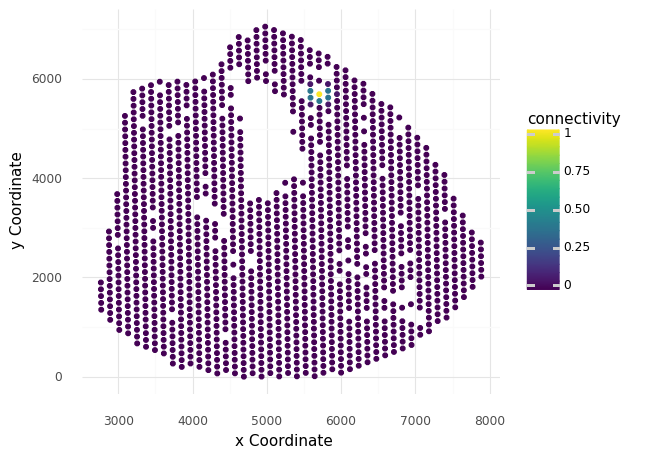

<ggplot: (8776883656101)>

In [8]:
li.pl.connectivity(adata, idx=1, spatial_key='spatial', connectivity_key='spatial_connectivities')

In [9]:
adata.uns['global_res'].sort_values('global_mean').tail(10)

ligand receptor  ligand_means  ligand_props  receptor_means  \
978     Calr    Itgav      2.058757      0.969986        0.899687   
364      App    Aplp2      1.412246      0.875171        1.263897   
1178    Cubn     Lrp2      1.150116      0.746930        2.020214   
1168     Lpl     Lrp2      1.402323      0.836289        2.020214   
1153     Egf     Lrp2      1.847275      0.879263        2.020214   
1156    Apoe     Lrp2      1.523888      0.897681        2.020214   
1170  Lrpap1     Lrp2      1.522354      0.875853        2.020214   
388      App     Rpsa      1.412246      0.875171        2.691449   
1177   Hspa8     Lrp2      2.662398      0.993179        2.020214   
1174    Tcn2     Lrp2      2.582618      0.991814        2.020214   

      receptor_props  interaction  global_mean  global_sd  
978         0.724420   Calr&Itgav     0.787818   0.151933  
364         0.836971    App&Aplp2     0.790558   0.169182  
1178        0.918145    Cubn&Lrp2     0.808609   0.197309  
1168        0.918145     Lpl&Lrp2     0.818704   0.156763  
1153        0.918145     Egf&Lrp2     0.825158   0.132547  
1156        0.918145    Apoe&Lrp2     0.839214   0.128549  
1170        0.918145  Lrpap1&Lrp2     0.863096   0.143909  
388         0.993179     App&Rpsa     0.894778   0.097969  
1177        0.918145   Hspa8&Lrp2     0.916711   0.092025  
1174        0.918145    Tcn2&Lrp2     0.924610   0.095479

In [10]:
# save results as modalities
local_lr = li.fun.obsm_to_adata(adata, 'local_scores')
local_pvals = li.fun.obsm_to_adata(adata, 'local_pvals')
local_cats = li.fun.obsm_to_adata(adata, 'local_categories')

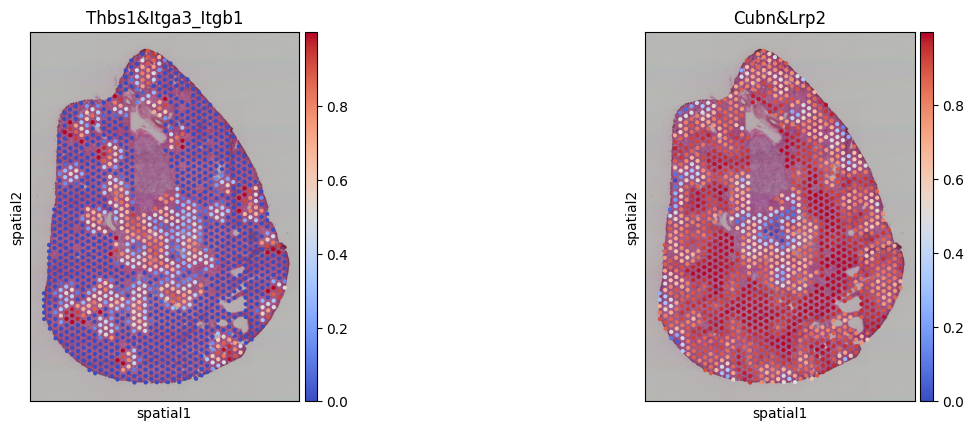

In [11]:
sc.pl.spatial(local_lr, color=['Thbs1&Itga3_Itgb1', 'Cubn&Lrp2'], cmap='coolwarm')

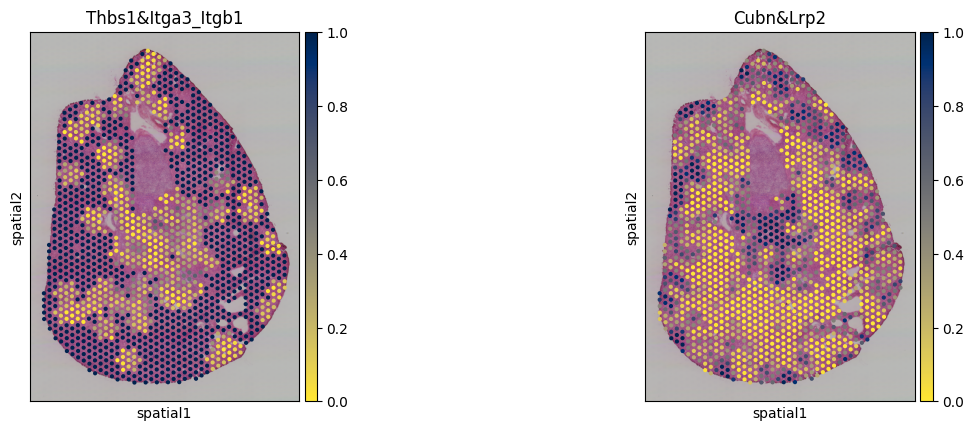

In [12]:
sc.pl.spatial(local_pvals, color=['Thbs1&Itga3_Itgb1', 'Cubn&Lrp2'], cmap='cividis_r')

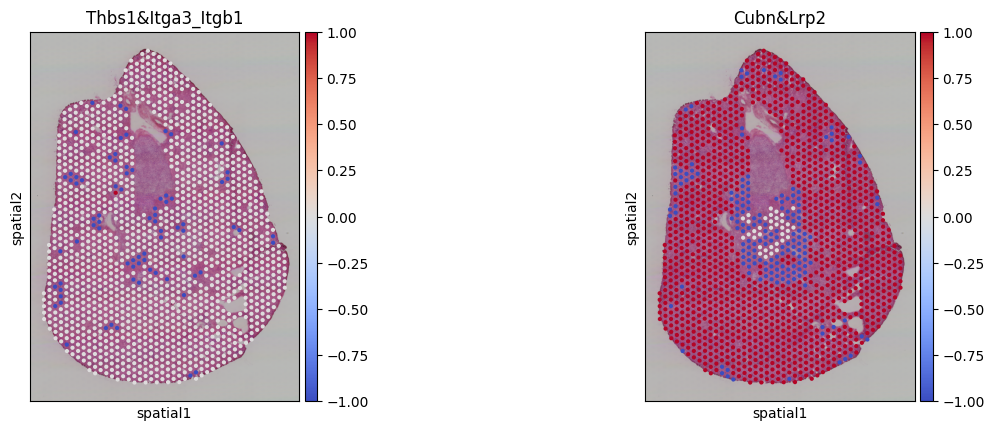

In [13]:
sc.pl.spatial(local_cats, color=['Thbs1&Itga3_Itgb1', 'Cubn&Lrp2'], cmap='coolwarm')

Load MOFAtalk loadings

In [14]:
lr_loadings = pd.read_csv(os.path.join('../../data/kidney_injury', 'lr_loadings.csv'), index_col=0)

# replace sep ^ with &: TODO: standardize this in the code
lr_loadings.index = lr_loadings.index.str.replace('^', '&')

/tmp/ipykernel_208119/580130855.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [15]:
lrdata = mdatas['f12hr'].mod['lrs'].copy()

In [16]:
lr_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False).head(20)

view   Factor1   Factor2   Factor3   Factor4  \
variable                                                                   
Slit2&Robo2              CNT&Fib -3.171660  0.223247  0.027718  0.257547   
Slit2&Robo2              DCT&Fib -3.145700  0.994464  0.028020  0.355244   
Slit2&Robo1          DCT-CNT&Uro -3.137715 -1.707674  0.024842  0.132992   
Slit2&Robo1              DCT&Uro -3.065370 -3.426198  0.053162 -0.154428   
Slit2&Robo1              CNT&Uro -3.063561 -2.986251  0.126222 -0.021577   
Slit2&Robo1          DCT-CNT&Fib -3.041750 -0.017318 -0.011911 -1.160912   
Spp1&Itgav_Itgb1        CTAL&PEC  3.004939  1.967342  2.793348  0.002015   
Spp1&Itga9_Itgb1         CNT&Per  2.943879 -0.005464 -0.003711 -0.001683   
Vegfa&Itgb1              Pod&Pod  2.921385 -1.282874  0.062760  0.069344   
Slit2&Robo1              ICB&Uro -2.863086 -0.000896  0.008605 -0.003691   
Lama2&Dag1               Fib&PEC -2.850898 -0.079139  0.137433  0.992244   
Shank2&Cftr         CTAL&DTL-ATL -2.816317  4.235057 -2.422098 -9.421417   
Slit2&Robo1              DCT&Fib -2.760581  0.110584  0.075942  0.052959   
Slit2&Robo1              ICA&Uro -2.744292 -2.591818  0.006771 -0.027634   
Hspg2&Lrp2                Fib&PT -2.733439  0.001550 -0.000880  0.000640   
Spp1&Itgav_Itgb1          EC&PEC  2.714385  0.002024  0.002362  0.003281   
Hspg2&Lrp2                 PC&PT -2.677979  0.081828 -0.073816 -0.002976   
Slit2&Robo1              CNT&Fib -2.676842  0.007547  0.196446  0.555670   
Col4a3&Itga9_Itgb1   DTL-ATL&Per -2.663995  0.284251  0.023874  0.043979   
Vegfa&Itga9              Pod&Fib  2.626509 -0.002015  0.000867  0.000748   

                     Factor5  
variable                      
Slit2&Robo2         0.005480  
Slit2&Robo2        -0.003128  
Slit2&Robo1        -0.020354  
Slit2&Robo1        -0.400792  
Slit2&Robo1        -0.002041  
Slit2&Robo1         0.004470  
Spp1&Itgav_Itgb1   -0.012479  
Spp1&Itga9_Itgb1    0.005853  
Vegfa&Itgb1        -0.006766  
Slit2&Robo1        -0.012066  
Lama2&Dag1          0.004477  
Shank2&Cftr        -0.004183  
Slit2&Robo1         0.003321  
Slit2&Robo1         0.026314  
Hspg2&Lrp2         -0.003753  
Spp1&Itgav_Itgb1   -0.004496  
Hspg2&Lrp2         -0.003844  
Slit2&Robo1        -0.003987  
Col4a3&Itga9_Itgb1 -0.059285  
Vegfa&Itga9         0.002449

In [17]:
top_interactions = lr_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False).head(50)

In [18]:
top_interactions

view   Factor1   Factor2   Factor3   Factor4  \
variable                                                                      
Slit2&Robo2                 CNT&Fib -3.171660  0.223247  0.027718  0.257547   
Slit2&Robo2                 DCT&Fib -3.145700  0.994464  0.028020  0.355244   
Slit2&Robo1             DCT-CNT&Uro -3.137715 -1.707674  0.024842  0.132992   
Slit2&Robo1                 DCT&Uro -3.065370 -3.426198  0.053162 -0.154428   
Slit2&Robo1                 CNT&Uro -3.063561 -2.986251  0.126222 -0.021577   
Slit2&Robo1             DCT-CNT&Fib -3.041750 -0.017318 -0.011911 -1.160912   
Spp1&Itgav_Itgb1           CTAL&PEC  3.004939  1.967342  2.793348  0.002015   
Spp1&Itga9_Itgb1            CNT&Per  2.943879 -0.005464 -0.003711 -0.001683   
Vegfa&Itgb1                 Pod&Pod  2.921385 -1.282874  0.062760  0.069344   
Slit2&Robo1                 ICB&Uro -2.863086 -0.000896  0.008605 -0.003691   
Lama2&Dag1                  Fib&PEC -2.850898 -0.079139  0.137433  0.992244   
Shank2&Cftr            CTAL&DTL-ATL -2.816317  4.235057 -2.422098 -9.421417   
Slit2&Robo1                 DCT&Fib -2.760581  0.110584  0.075942  0.052959   
Slit2&Robo1                 ICA&Uro -2.744292 -2.591818  0.006771 -0.027634   
Hspg2&Lrp2                   Fib&PT -2.733439  0.001550 -0.000880  0.000640   
Spp1&Itgav_Itgb1             EC&PEC  2.714385  0.002024  0.002362  0.003281   
Hspg2&Lrp2                    PC&PT -2.677979  0.081828 -0.073816 -0.002976   
Slit2&Robo1                 CNT&Fib -2.676842  0.007547  0.196446  0.555670   
Col4a3&Itga9_Itgb1      DTL-ATL&Per -2.663995  0.284251  0.023874  0.043979   
Vegfa&Itga9                 Pod&Fib  2.626509 -0.002015  0.000867  0.000748   
Slit3&Robo1                 Per&Fib -2.612692  0.960574 -4.585711  0.004236   
Tnc&Sdc4                Fib&DTL-ATL  2.609078 -0.283844  0.000332  0.313467   
Slit3&Robo1                 Per&Uro -2.586250 -0.046029 -2.550542 -0.010280   
Tnc&Sdc4                   PEC&MTAL  2.577488 -0.142462 -0.001330 -0.739765   
Tnc&Sdc4                    Fib&Uro  2.558292 -1.345100  0.101827  0.025782   
Tnc&Itga2                    PEC&PC  2.541059  0.001938 -0.103932  0.000522   
Adam12&Sdc4                  Fib&PT  2.523985  0.004447  0.001020  0.001881   
Slit2&Robo1                MTAL&Uro -2.501339 -0.036768  0.187841 -0.003846   
Shank2&Cftr                CTAL&Pod -2.492122  0.607766  0.005054  0.006942   
Slit2&Robo1                CTAL&Uro -2.490296  0.258819  0.008155 -0.812240   
Slit2&App                   CNT&Pod -2.487219 -1.961729 -0.005545 -0.007835   
Slit2&Robo2             DCT-CNT&Fib -2.474280  0.000211  0.013698  0.125956   
Col18a1&Itgb5               Uro&Pod  2.466622  0.003996  0.008935  0.000737   
Tnc&Itga9_Itgb1             Fib&Fib  2.459765 -0.014892  0.135892  0.567003   
Spp1&Itgav_Itgb5            DCT&Pod  2.455679 -0.005731 -0.325078 -0.014627   
Spp1&Itgav_Itgb1            DCT&Pod  2.455679 -0.005731 -0.325078 -0.014627   
Slit2&Robo1                CTAL&Fib -2.452236  3.320438  0.266976  0.144193   
Sema5a&Met          DTL-ATL&DTL-ATL -2.448657  0.003069 -0.059639 -0.007137   
Gpc3&Igf1r                   PEC&PT -2.443581 -0.000400  0.271356  0.050993   
Psap&Sort1              DCT-CNT&Uro  2.439739 -0.083612 -0.174937 -0.105684   
Spp1&Itga9_Itgb1            Fib&Fib  2.430640  0.005157  0.142776  0.590004   
Spp1&Itga9_Itgb1            Per&Per  2.425925  0.000271  0.002504  0.019007   
Slit3&Robo2                 Fib&Fib -2.422408  0.006815  0.172074  0.682324   
Col18a1&Itgb5               Fib&Pod -2.415499  0.001887 -0.038771  0.217901   
Col4a3&Itga2_Itgb1      DTL-ATL&Uro -2.414068  0.000007  0.187725 -0.000296   
Tnc&Sdc4                     Fib&PT  2.413543  0.003755  0.000805  0.001598   
Tnc&Itgav_Itgb6              Fib&PT  2.408926  0.003273  0.000848  0.001463   
Tnc&Itga2                   Fib&Uro  2.401734  2.760435  0.018208  0.005287   
Tnc&Sdc4                    Fib&Pod  2.398726  1.217310  0.015868  0.134295   
Sp

In [19]:
top_interactions = np.unique(top_interactions.index)

In [20]:
top_interactions

array(['Adam12&Sdc4', 'Col18a1&Itgb5', 'Col4a3&Itga2_Itgb1',
       'Col4a3&Itga9_Itgb1', 'Gpc3&Igf1r', 'Hspg2&Lrp2', 'Lama2&Dag1',
       'Psap&Sort1', 'Sema5a&Met', 'Shank2&Cftr', 'Slit2&App',
       'Slit2&Robo1', 'Slit2&Robo2', 'Slit3&Robo1', 'Slit3&Robo2',
       'Spp1&Itga9_Itgb1', 'Spp1&Itgav_Itgb1', 'Spp1&Itgav_Itgb5',
       'Spp1&Itgav_Itgb6', 'Tnc&Itga2', 'Tnc&Itga9_Itgb1',
       'Tnc&Itgav_Itgb6', 'Tnc&Sdc4', 'Vegfa&Itga9', 'Vegfa&Itgb1'],
      dtype=object)

In [21]:
import re

In [32]:
# interaction = 'Spp1&Itgav_Itgb1' # Up in Factor 1
interaction = 'Slit2&Robo2' # Down in Factor 1

In [33]:
# split interaction with regex acc to & and _
genes = re.split('[&_]', interaction)

In [34]:
mdatas.keys()

dict_keys(['f12hr', 'f2dps', 'f4hr', 'f6wks', 'fsham'])

In [35]:
times = ['f4hr', 'f12hr', 'f2dps', 'f6wks', 'fsham']

f4hr
f12hr
f2dps
f6wks
fsham


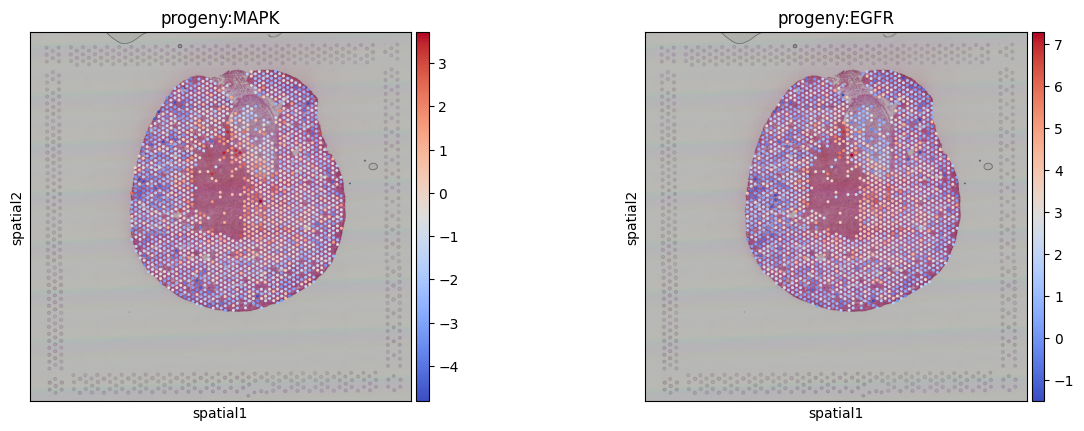

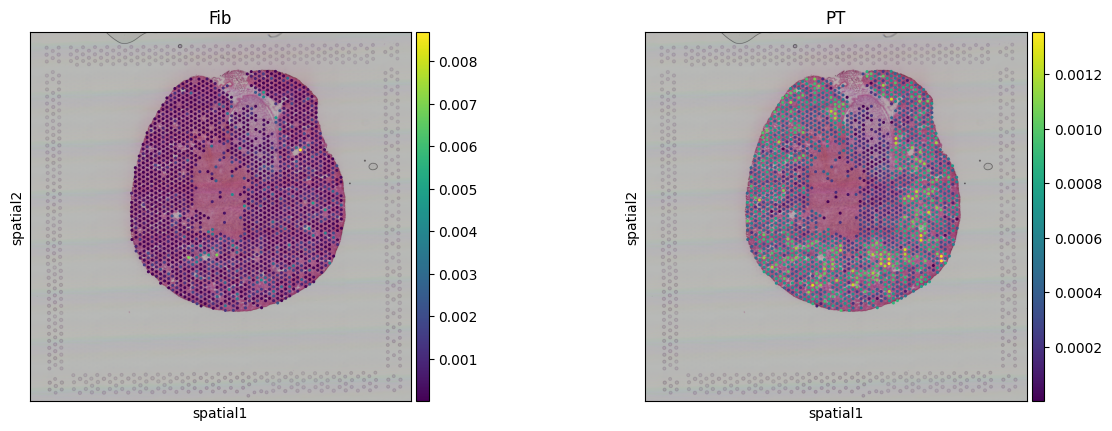

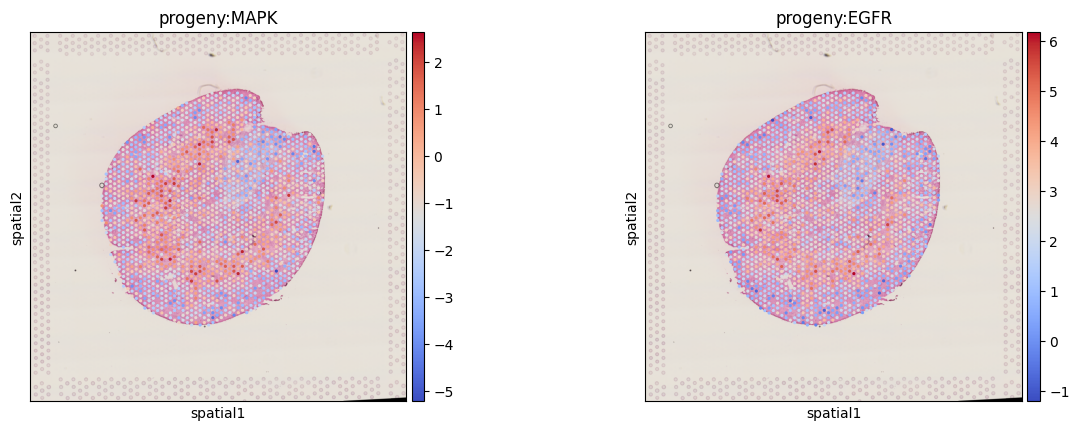

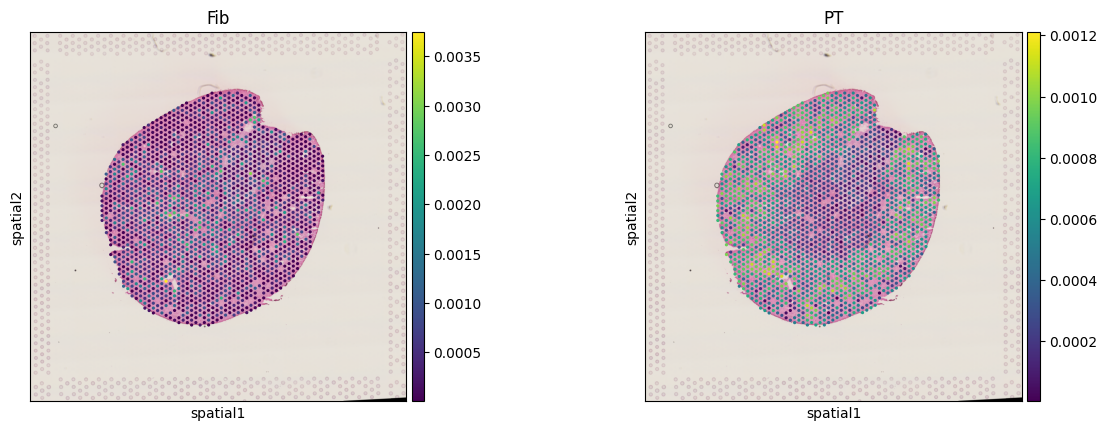

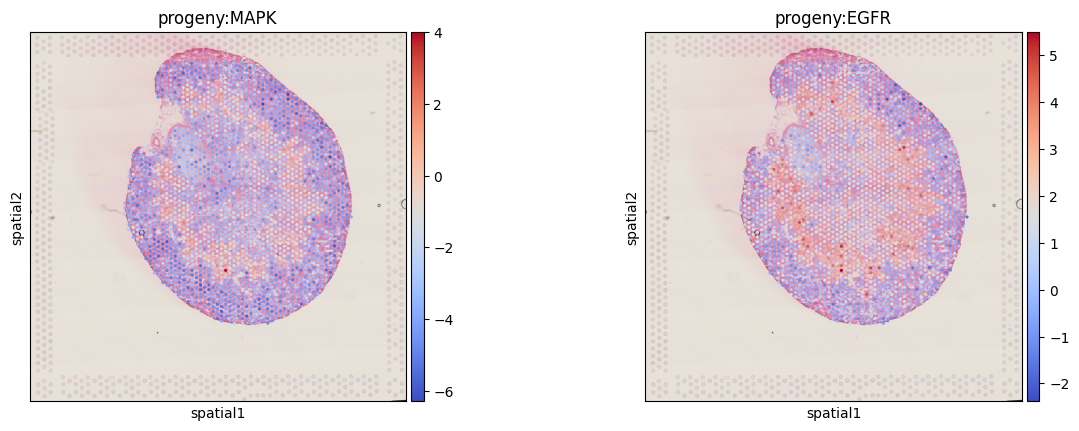

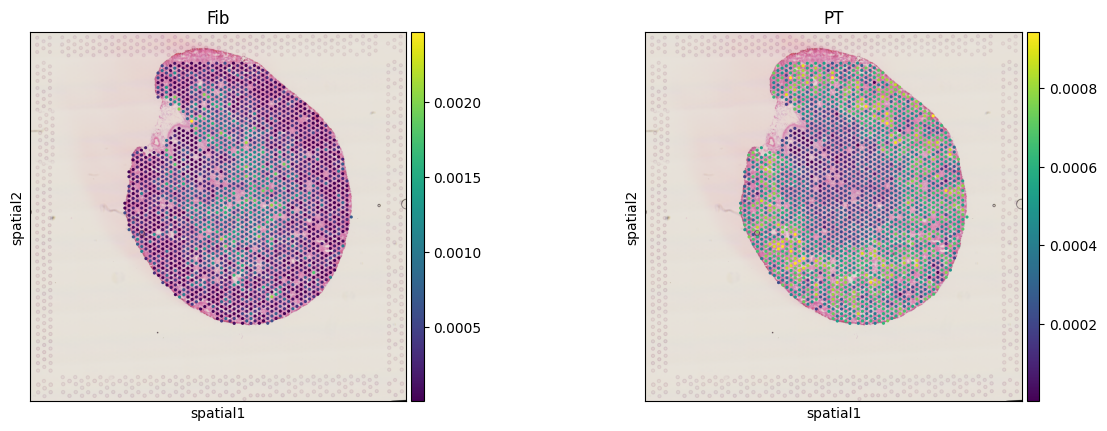

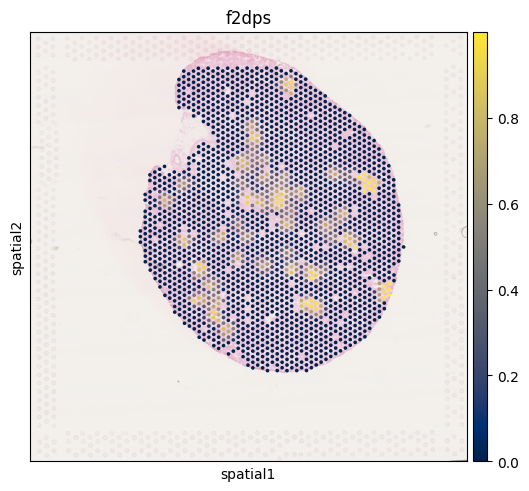

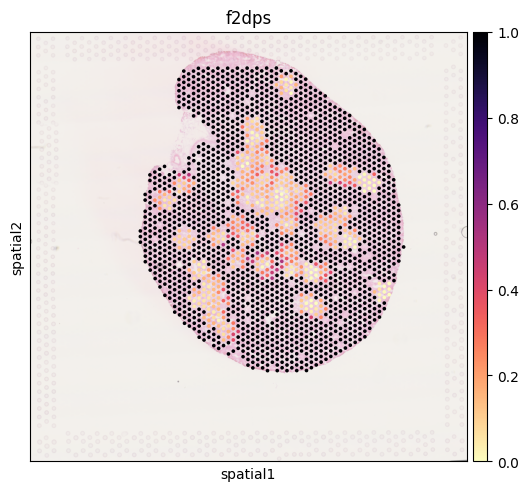

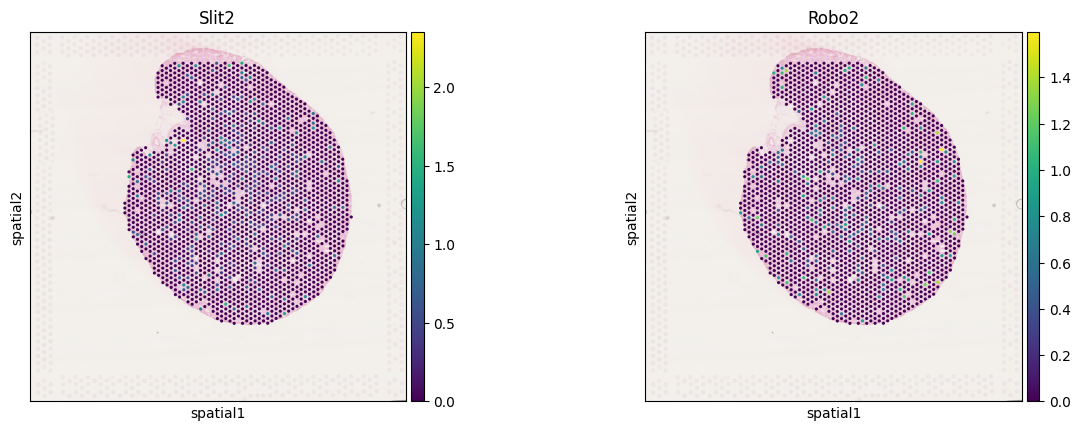

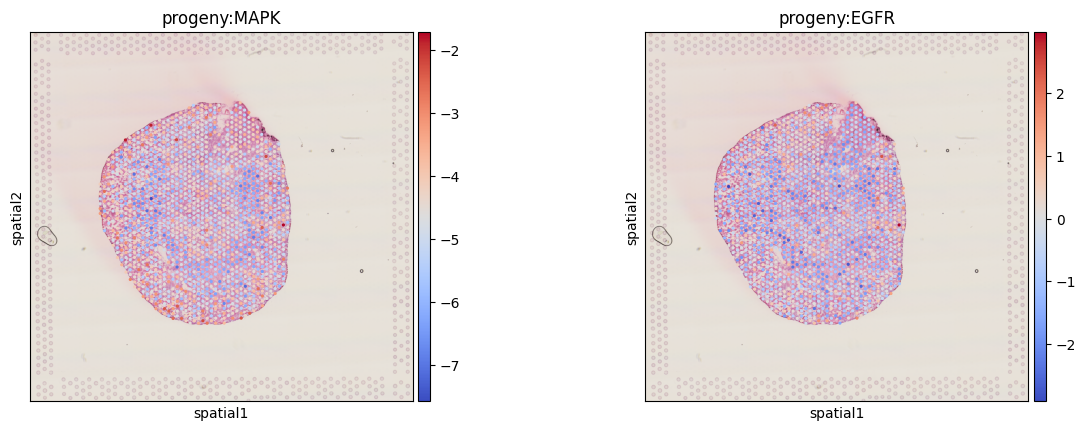

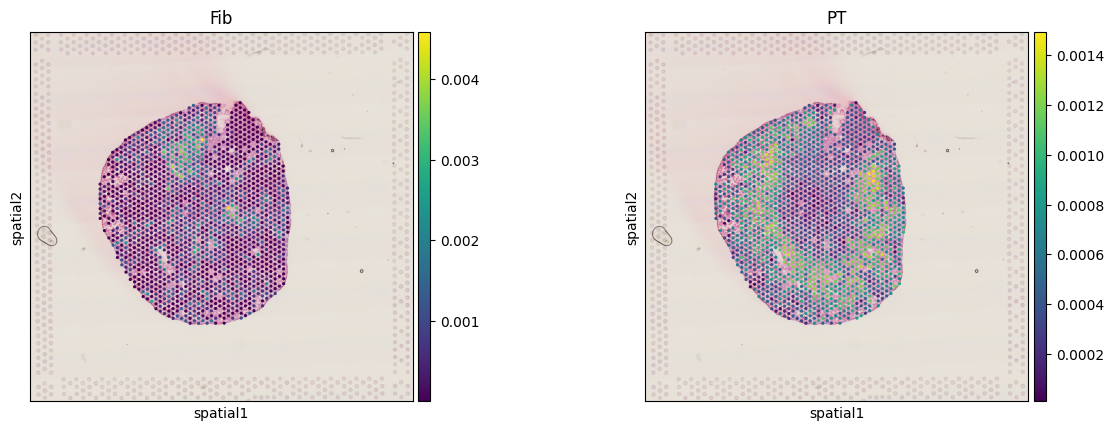

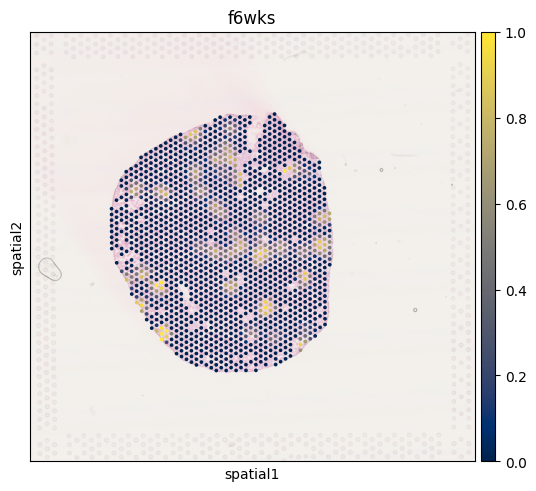

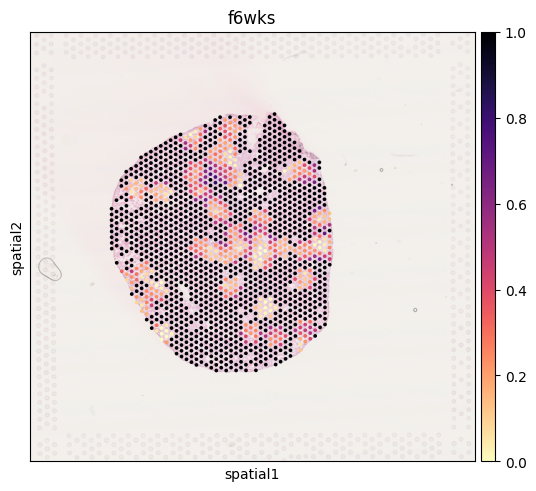

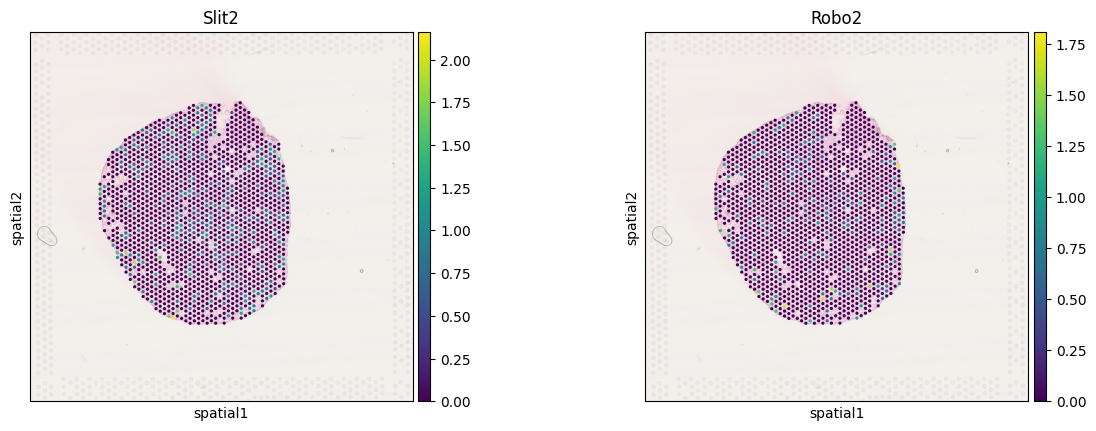

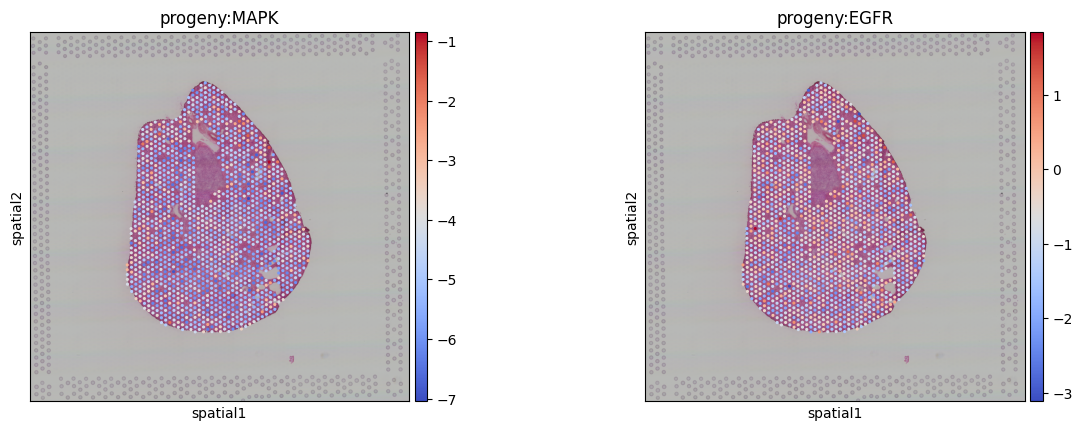

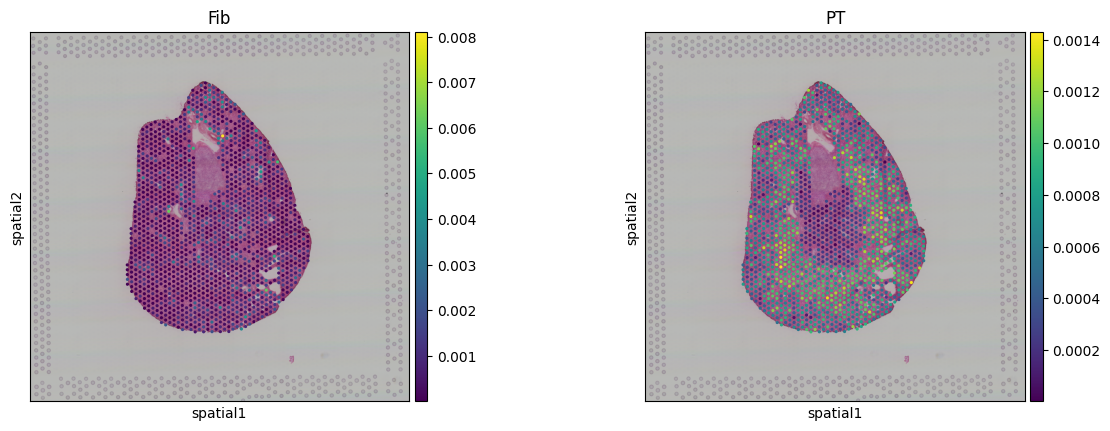

In [36]:
for slide in times:
    print(slide)
        
    # Up in MOFAcell Fibroblast loadings
    sq.pl.spatial_scatter(mdatas[slide].mod['progeny'], color=['progeny:MAPK', 'progeny:EGFR'], ncols=2, cmap='coolwarm', legend_fontsize='xx-large')
    sq.pl.spatial_scatter(mdatas[slide].mod['tangram'], color=['Fib', 'PT'], ncols=2, cmap='viridis', legend_fontsize='xx-large')
        
    if interaction in mdatas[slide].mod['lrs'].var.index:
        sq.pl.spatial_scatter(mdatas[slide].mod['lrs'], color=[interaction], ncols=2, cmap='cividis', title=slide, img_alpha=0.5, legend_fontsize='xx-large')
        # reverse cmap
        sq.pl.spatial_scatter(mdatas[slide].mod['lr_pvals'], color=[interaction], ncols=2, title=slide, cmap='magma_r', img_alpha=0.5, legend_fontsize='xx-large')
        # sq.pl.spatial_scatter(mdatas[slide].mod['lr_cats'], color=[interaction], ncols=2, title=slide, cmap='viridis')
        sq.pl.spatial_scatter(mdatas[slide].mod['rna'], color=genes, cmap='viridis', img_alpha=0.5, legend_fontsize='xx-large')

In [ ]:
sq.pl.spatial_scatter(mdatas['f2dps'].mod['lrs'], color=[interaction], ncols=2, cmap='magma', title=slide, vmin=0, img_alpha=0.5, legend_fontsize='xx-large')

In [ ]:
mdatas.keys()

In [ ]:
sq.pl.spatial_scatter(mdatas['f12hr'].mod['tangram'], color=['Uro', 'PT'], ncols=2, cmap='viridis')

cell type prop relationships

In [ ]:
from liana.mt.sp import bivar

In [ ]:
mdata = mdatas['f12hr']

In [ ]:
mdata.obsm = mdatas['f12hr'].mod['rna'].obsm
mdata.uns = mdatas['f12hr'].mod['rna'].uns
mdata.obsp = mdatas['f12hr'].mod['rna'].obsp

In [ ]:
bivar(mdata,
      function_name='cosine', 
      x_mod='tangram',
      y_mod='tangram',
      mod_added = 'cell_props'
      )

In [ ]:
sq.pl.spatial_scatter(mdata.mod['lrs'], color=[interaction], ncols=2, cmap='viridis', title=slide, vmax=1)

In [ ]:
mdata.mod['tangram'].var

### From HERE on, we likely move these analysis steps to Heart Visium?

## Run NMF on the whole Dataset

In [ ]:
from sklearn.decomposition import NMF

Bind all LR results

In [ ]:
lrdatas = dict()
for sample in mdatas.keys():
    lrdatas[sample] = mdatas[sample].mod['lrs']

In [ ]:
lrdata_all = sc.concat(lrdatas, join='outer', fill_value=0)

In [ ]:
lrdata_all

### Reconstruction Error NMF

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = lrdata_all.X

In [ ]:
def calculate_reconstruction_error(X, n):
    model = NMF(n_components=n, random_state=0)  # Create NMF model
    W = model.fit_transform(X)  # Compute NMF decomposition
    H = model.components_
    Xhat = np.dot(W, H)
    error = np.mean(np.sqrt((X - Xhat) ** 2))  # Reconstruction error
    return error


In [ ]:
n_values = range(1, 20)

In [ ]:
errors = []
for n in n_values:
    error = calculate_reconstruction_error(X, n)  # X is your input data
    errors.append(error)


In [ ]:
plt.plot(n_values, errors, marker='o')
plt.xlabel('Factor n')
plt.ylabel('Reconstruction Error')
plt.title('Variance/Standard Error vs Factor n')
plt.show()

### NMF

In [ ]:
# Create an instance of the NMF class
model = NMF(n_components=5, init='random', random_state=0)

# Fit the model to the data and obtain the factorized matrices
W = model.fit_transform(lrdata_all.X)
H = model.components_

In [ ]:
 ## NOTE take index from adata.obs.index, not from the obsm matrix
columns = [f"Factor{i+1}" for i in range(W.shape[1])]
lrdata_all.obsm['NMF_W'] = pd.DataFrame(W, index=lrdata_all.obs.index, columns=columns)
lrdata_all.varm['NMF_H'] = H.T # NOTE I don't convert to dataframe, because it does not get filtered

## Pathway Enrichment on Ligand-Receptor Factor Loadings

In [ ]:
lr_loadings = pd.DataFrame(lrdata_all.varm['NMF_H'], index=lrdata_all.var.index, columns=columns)

In [ ]:
lr_loadings.sort_values("Factor3", ascending=False)

In [ ]:
# load PROGENy pathways
net = dc.get_progeny(organism='Mus musculus', top=5000)

# load full list of ligand-receptor pairs
lr_pairs = li.resource.select_resource('mouseconsensus')

# generate ligand-receptor geneset
lr_progeny = li.fun.generate_lr_geneset(lr_pairs, net, lr_separator="&") # NOTE I should change & to & in basis for consistency
lr_progeny.head()

In [ ]:
estimate, pvals = dc.run_mlm(lr_loadings.transpose(), lr_progeny, source="source", target="interaction", use_raw=False)

In [ ]:
estimate

In [ ]:
sns.clustermap(estimate, cmap='coolwarm', center=0, vmin=-5, vmax=5, col_cluster=False)

### Transfer NMF factors to the individual samples

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(20, 5), sharex=True, sharey=True)

In [ ]:
n = 0
# transfer the NMF factors to the individual samples
for sample in lrdatas:
    # each
    lrdata = lrdatas[sample]
    
    # Get the NMF factors for the current sample from the full dataset
    temp = lrdata_all[lrdata_all.obs.index.isin(lrdata.obs.index), :]
    temp = temp[:, temp.var.index.isin(lrdata.var.index)]
    
    # extract from obsm
    ## TODO need to figure out how to handle .obsm & .uns - they keep getting copied over
    ad_nmf = li.fun.obsm_to_adata(temp, obsm_key='NMF_W', _uns=lrdata.uns)
    
    # plot
    sc.pl.spatial(ad_nmf, color=temp.obsm['NMF_W'].columns, cmap='cividis', title=sample)
                  # , ax=ax[n], vmax=1, vmin=0) # 
    
    # save to MuData
    mdatas[sample].mod['nmf'] = ad_nmf
    n=n+1

In [ ]:
fig.clear()

In [ ]:
# overwrite the old mdatas
for sample in mdatas.keys():
    mdatas[sample].write(os.path.join(data_dir, "mdatas", sample + ".h5ad"))

In [ ]:
lrdata_all.write_h5ad("../../data/kidney_injury/lrs_all_factors.h5ad")

In [ ]:
deconv = mdatas['f12hr'].mod['tangram']

In [ ]:
sc.pl.spatial(deconv, color=deconv.var_names)

### Mitsy

In [ ]:
from liana.mt.sp._misty_constructs import lrMistyData, genericMistyData

In [ ]:
from liana.pl._misty_plots import plot_target_metrics, plot_interactions, plot_contributions

In [ ]:
mdata = mdatas['f12hr']
mdata

In [ ]:
misty = genericMistyData(intra=mdata.mod['progeny'], extra=mdata.mod['dorothea'], bandwidth=200, cutoff=0.05, kernel="gaussian")

In [ ]:
misty

In [ ]:
misty(verbose=True, model='linear', bypass_intra=True)

In [ ]:
plot_target_metrics(misty, stat='gain_R2', return_fig=True)

In [ ]:
misty.uns['target_metrics']

In [ ]:
plot_target_metrics(misty, stat='intra_R2', return_fig=True)

In [ ]:
plot_contributions(misty)

In [ ]:
misty.uns['interactions'].sort_values('importances', ascending=True).head(20)

LR Misty

In [ ]:
adata = mdatas['f12hr']['rna']

In [ ]:
misty = lrMistyData(adata, resource_name="MouseConsensus", nz_threshold=0.2, bandwidth=200, cutoff=0.05, kernel='gaussian', verbose=True)

In [ ]:
misty(verbose=True, model='linear', bypass_intra=True)

In [ ]:
## NOTE: we get some perfect predictions (i.e. I should include a filter of genes in R, not to be in L)

In [ ]:
target_metrics(misty, stat='gain_R2', return_fig=True)

In [ ]:
misty.uns['target_metrics'].sort_values('gain_R2', ascending=False).head(20)

In [ ]:
misty.uns['interactions'].sort_values('importances', ascending=False)